In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [35]:
dados_clientes= pd.read_csv('previsao_de_renda.csv')

In [38]:
#selecionando apenas as variáveis de interesse
var_selecionadas=dados_clientes[['renda', 'posse_de_veiculo', 'posse_de_imovel']]

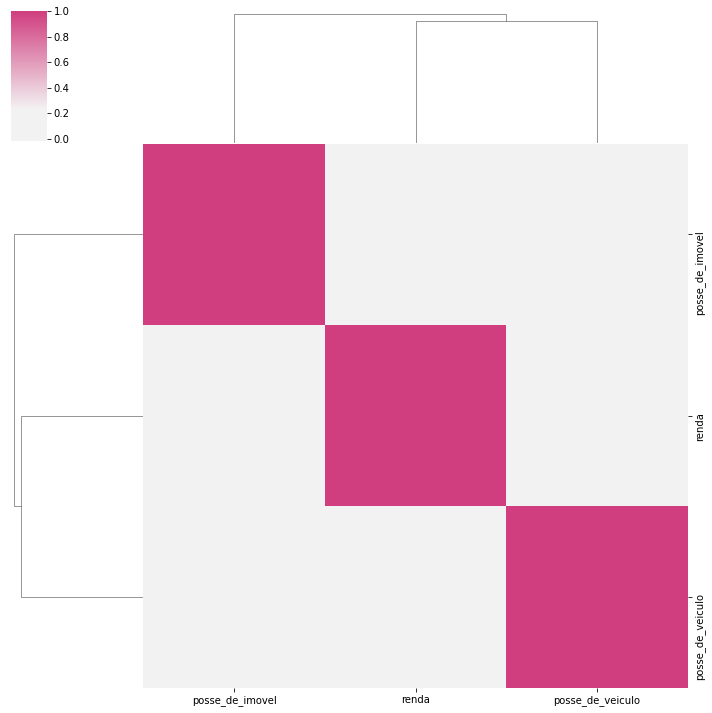

In [39]:
#exibindo o cluster map dessas variáveis para ver se elas tem relação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(var_selecionadas.corr(), figsize=(10, 10), center = 0, cmap=cmap)


Com o cluster map não é possível identificar correlações entre as variáveis analisadas.

Agora, a fim de plotar a matriz de dispersão das variáveis, iremos transformá-las para dummies.

In [40]:
#transformando posse_de_veiculo para dummie
var_selecionadas.posse_de_veiculo=var_selecionadas.posse_de_veiculo.map({True:1, False:0})

/tmp/ipykernel_4869/1497655224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_selecionadas.posse_de_veiculo=var_selecionadas.posse_de_veiculo.map({True:1, False:0})


In [41]:
#transformando posse de imovel para dummie
var_selecionadas.posse_de_imovel=var_selecionadas.posse_de_imovel.map({True:1, False:0})

/tmp/ipykernel_4869/3851201145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_selecionadas.posse_de_imovel=var_selecionadas.posse_de_imovel.map({True:1, False:0})


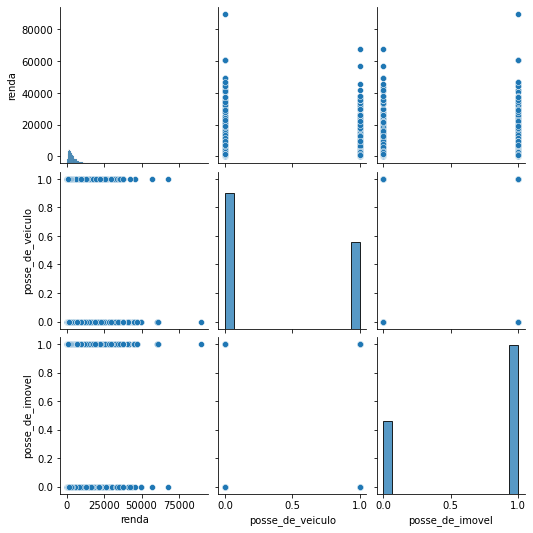

In [43]:
#matriz de dispersão
sns.pairplot(var_selecionadas)

Ainda não foi possível identificar relações. Portanto, agora tentaremos outro método de análise, utilizaremos o pointplot.

In [45]:
var_de_interesse=dados_clientes[['renda', 'posse_de_veiculo', 'posse_de_imovel']]

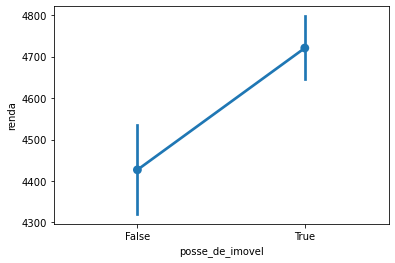

In [47]:
#pointplot utilizando a média de renda para posse ou não de imovel
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=var_de_interesse, dodge=True, ci = 90)

Com a visualização do pointplot podemos ver que a média salarial de quem não possui imóvel está próxima de 4400 reais, enquanto que a média salarial de quem possui imovel está próxima de 4700 reais, o que nos revela que com uma renda maior, a probabilidade de possuir um imóvel também é maior. 

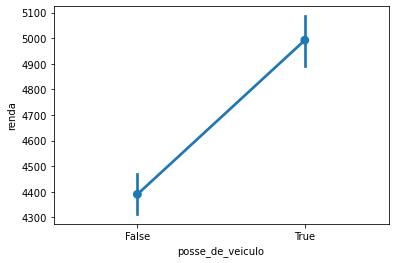

In [30]:
#pointplot utilizando a média de renda para posse ou não de veículo
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=var_selecionadas, dodge=True, ci = 90)

Com a visualização do pointplot podemos ver que a média salarial de quem não possui veículo está próxima de 4400 reais, enquanto que a média salarial de quem possui imovel está próxima de 5000 reais, o que nos revela que com uma renda maior, a probabilidade de possuir um veículo também é maior. 

As análises revelaram que o pointplot é um método de análise mais eficaz para variáveis qualitativas.